## This is the code to compare if phase precession is stable across trials in the same cell

In [89]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
##load /home/zilong/Desktop/HDPhasePrecession/results/phaseinfo_light1.pkl
with open('/home/zilong/Desktop/HDPhasePrecession/results/phaseinfo_light1.pkl', 'rb') as f:
    phaseinfo_light1 = pickle.load(f)

##load /home/zilong/Desktop/HDPhasePrecession/results/phaseinfo_light2.pkl
with open('/home/zilong/Desktop/HDPhasePrecession/results/phaseinfo_light2.pkl', 'rb') as f:
    phaseinfo_light2 = pickle.load(f)

In [11]:
#hcekc if keys in phaseinfo_light1 and phaseinfo_light2 are overlapped, if overlapped, print the overlapped keys, count the number of overlapped keys
overlap = 0
overlap_keys  = []
for key in phaseinfo_light1.keys():
    if key in phaseinfo_light2.keys():
        overlap += 1
        overlap_keys.append(key)
print(len(phaseinfo_light1.keys()), len(phaseinfo_light2.keys()), overlap)     

359 354 224


In [12]:
#for overlap keys, extract phase info in two groups
pvals_light1 = []
pvals_light2 = []

clr_light1 = []
clr_light2 = []

tune_width_light1 = []
tune_width_light2 = []

peak_fr_light1 = []
peak_fr_light2 = []

hd_rayleigh_light1 = []
hd_rayleigh_light2 = []

for key in overlap_keys:
    pvals_light1.append(phaseinfo_light1[key]['pval'])
    pvals_light2.append(phaseinfo_light2[key]['pval'])
    
    clr_light1.append(phaseinfo_light1[key]['clr'])
    clr_light2.append(phaseinfo_light2[key]['clr'])
    
    tune_width_light1.append(phaseinfo_light1[key]['tune_width'])
    tune_width_light2.append(phaseinfo_light2[key]['tune_width'])
    
    peak_fr_light1.append(phaseinfo_light1[key]['peak_fr'])
    peak_fr_light2.append(phaseinfo_light2[key]['peak_fr'])
    
    hd_rayleigh_light1.append(phaseinfo_light1[key]['hd_rayleigh'])
    hd_rayleigh_light2.append(phaseinfo_light2[key]['hd_rayleigh'])


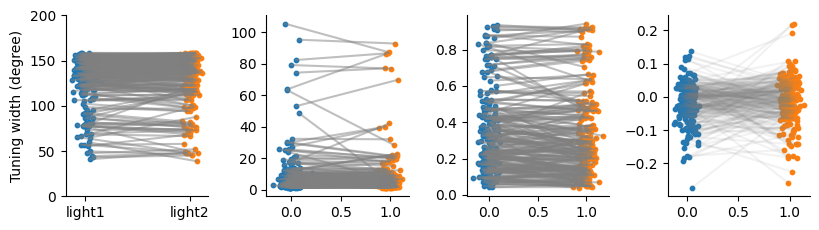

In [30]:
fig, axs = plt.subplots(1, 4, figsize=(8.3, 2.4))

ax = axs[0]

#scatter plot of tune width in light1 and light2 and link each pair with a line
for i in range(len(tune_width_light1)):
    x1 = 0+np.random.randn()*0.05
    ax.scatter(x1, tune_width_light1[i], color='#1f77b4', s=10)
    x2 = 1+np.random.randn()*0.05
    ax.scatter(x2, tune_width_light2[i], color='#ff7f0e', s=10)
    #link each pair with a line
    ax.plot([x1, x2], [tune_width_light1[i], tune_width_light2[i]], color='gray', alpha=0.5)

ax.set_ylabel('Tuning width (degree)')
ax.set_xticks([0, 1])
ax.set_xticklabels(['light1', 'light2'])
ax.set_ylim([0,200])

ax = axs[1]

#scatter plot of peak firing rate in light1 and light2 and link each pair with a line
for i in range(len(peak_fr_light1)):
    x1 = 0+np.random.randn()*0.05
    ax.scatter(x1, peak_fr_light1[i], color='#1f77b4', s=10)
    x2 = 1+np.random.randn()*0.05
    ax.scatter(x2, peak_fr_light2[i], color='#ff7f0e', s=10)
    #link each pair with a line
    ax.plot([x1, x2], [peak_fr_light1[i], peak_fr_light2[i]], color='gray', alpha=0.5)


ax = axs[2]

#scatter plot of HD Rayleigh in light1 and light2 and link each pair with a line
for i in range(len(hd_rayleigh_light1)):
    x1 = 0+np.random.randn()*0.05
    ax.scatter(x1, hd_rayleigh_light1[i], color='#1f77b4', s=10)
    x2 = 1+np.random.randn()*0.05
    ax.scatter(x2, hd_rayleigh_light2[i], color='#ff7f0e', s=10)
    #link each pair with a line
    ax.plot([x1, x2], [hd_rayleigh_light1[i], hd_rayleigh_light2[i]], color='gray', alpha=0.5)

ax = axs[3]

#scatter plot of clr in light1 and light2 and link each pair with a line
for i in range(len(clr_light1)):
    x1 = 0+np.random.randn()*0.05
    ax.scatter(x1, clr_light1[i], color='#1f77b4', s=10)
    x2 = 1+np.random.randn()*0.05
    ax.scatter(x2, clr_light2[i], color='#ff7f0e', s=10)
    #link each pair with a line
    ax.plot([x1, x2], [clr_light1[i], clr_light2[i]], color='gray', alpha=0.1)


for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()


<BarContainer object of 2 artists>

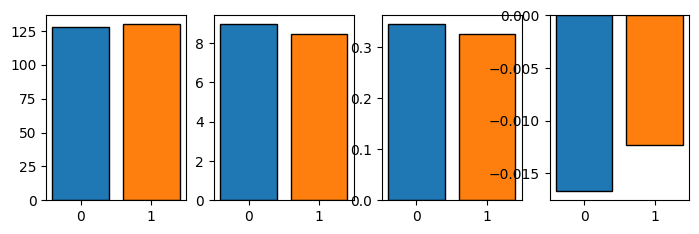

In [27]:
#perform a bar plot
fig, axs = plt.subplots(1, 4, figsize=(8.3, 2.4))

ax = axs[0]

#bar plot of tuning width in light1 and light2
ax.bar([0, 1], [np.mean(tune_width_light1), np.mean(tune_width_light2)], color=['#1f77b4', '#ff7f0e'], edgecolor='black')

ax = axs[1]
#bar plot of peak firing rate in light1 and light2
ax.bar([0, 1], [np.mean(peak_fr_light1), np.mean(peak_fr_light2)], color=['#1f77b4', '#ff7f0e'], edgecolor='black')

ax = axs[2]
#bar plot of HD Rayleigh in light1 and light2
ax.bar([0, 1], [np.mean(hd_rayleigh_light1), np.mean(hd_rayleigh_light2)], color=['#1f77b4', '#ff7f0e'], edgecolor='black')

ax = axs[3]
#bar plot of CLR in light1 and light2
ax.bar([0, 1], [np.mean(clr_light1), np.mean(clr_light2)], color=['#1f77b4', '#ff7f0e'], edgecolor='black')



In [35]:
pp_light1 = 0
for key in overlap_keys:
    if phaseinfo_light1[key]['pval']<0.05:
        pp_light1 += 1
print(pp_light1)

pp_light2 = 0
for key in overlap_keys:
    if phaseinfo_light2[key]['pval']<0.05:
        pp_light2 += 1
print(pp_light2)

pp_light1_light2 = 0
for key in overlap_keys:
    if phaseinfo_light1[key]['pval']<0.05:
        if phaseinfo_light2[key]['pval']<0.05:
            pp_light1_light2 += 1
            # print(key)
print(pp_light1_light2)

43
31
12


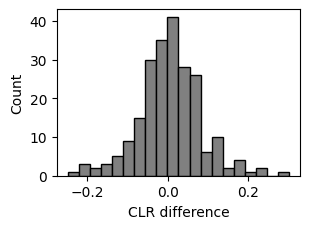

In [31]:
#check the difference between clr in light1 and light2 in overlap_keys
clr_diff = []
for key in overlap_keys:
    clr_diff.append(phaseinfo_light2[key]['clr'] - phaseinfo_light1[key]['clr'])

#histogram of clr difference
plt.figure(figsize=(3.2, 2.4))
plt.hist(clr_diff, bins=20, color='gray', edgecolor='black')
plt.xlabel('CLR difference')
plt.ylabel('Count')
plt.tight_layout()

0.29065567447736707 0.13348625392458358


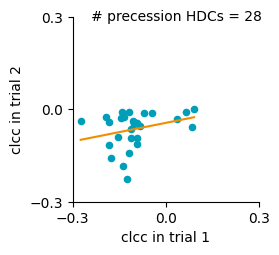

In [61]:
#check the correlation between clr in light1 and light2
from scipy.stats import pearsonr
clr_light1 = []
clr_light2 = []
for key in overlap_keys:
    if phaseinfo_light1[key]['pval']<0.05 and phaseinfo_light2[key]['clr']<0:
        clr_light1.append(phaseinfo_light1[key]['clr'])
        clr_light2.append(phaseinfo_light2[key]['clr'])
    
#print r and p value of the correlation
r, p = pearsonr(clr_light1, clr_light2)
print(r, p)

#scatter plot of clr in light1 and light2 with x axis as clr in light1 and y axis as clr in light2
fig, ax = plt.subplots(1, 1, figsize=(2.4, 2.4))
ax.scatter(clr_light1, clr_light2, color='#009FB9', s=20)

#add a fit line
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(clr_light1, clr_light2)
x = np.linspace(np.min(clr_light1), np.max(clr_light1), 100)
y = slope*x + intercept
ax.plot(x, y, color='#F18D00')

# #add an indetical line
# ax.plot([-0.3, 0.3], [-0.3, 0.3], color='black', linestyle='--')
#add cell number as text
ax.text(0.1, 0.98, '# precession HDCs = '+str(len(clr_light1)), fontsize=10, transform=ax.transAxes)

ax.set_xlim([-0.3, 0.3])
ax.set_ylim([-0.3, 0.3])
ax.set_xticks([-0.3, 0, 0.3])
ax.set_yticks([-0.3, 0, 0.3])

ax.set_xlabel('clcc in trial 1', fontsize=10)
ax.set_ylabel('clcc in trial 2', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


### scatter plot of all criteria

0.22349255918950295 0.0007546037844996143


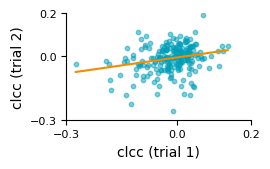

In [123]:

    
#check the correlation between clr in light1 and light2
from scipy.stats import pearsonr
clr_light1 = []
clr_light2 = []
for key in overlap_keys:
    clr_light1.append(phaseinfo_light1[key]['clr'])
    clr_light2.append(phaseinfo_light2[key]['clr'])
    
#print r and p value of the correlation
r, p = pearsonr(clr_light1, clr_light2)
print(r, p)

#scatter plot of clr in light1 and light2 with x axis as clr in light1 and y axis as clr in light2
fig, ax = plt.subplots(1, 1, figsize=(2.8, 1.8))
ax.scatter(clr_light1, clr_light2, color='#009FB9', s=10, alpha=0.5)

#add a fit line
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(clr_light1, clr_light2)
x = np.linspace(np.min(clr_light1), np.max(clr_light1), 100)
y = slope*x + intercept
ax.plot(x, y, color='#F18D00')

# #add cell number as text
# ax.text(0.2, 0.98, '# HDCs = '+str(len(clr_light1)), fontsize=10, transform=ax.transAxes)

ax.set_xlim([-0.3, 0.2])
ax.set_ylim([-0.3, 0.2])
ax.set_xticks([-0.3, 0, 0.2])
ax.set_yticks([-0.3, 0, 0.2])

ax.set_xlabel('clcc (trial 1)', fontsize=10)
ax.set_ylabel('clcc (trial 2)', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ticksize
ax.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()

plt.savefig('/home/zilong/Desktop/HDPhasePrecession/figures/trial_comp_clr.pdf', dpi=300)



0.9512379678432561 2.245419730576435e-115


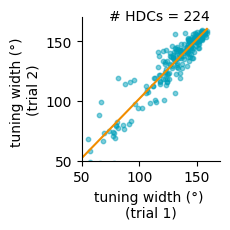

In [121]:

    
#check the correlation between clr in light1 and light2
from scipy.stats import pearsonr
clr_light1 = []
clr_light2 = []
for key in overlap_keys:
    clr_light1.append(phaseinfo_light1[key]['tune_width'])
    clr_light2.append(phaseinfo_light2[key]['tune_width'])
    
#print r and p value of the correlation
r, p = pearsonr(clr_light1, clr_light2)
print(r, p)

#scatter plot of clr in light1 and light2 with x axis as clr in light1 and y axis as clr in light2
fig, ax = plt.subplots(1, 1, figsize=(2.4, 2.4))
ax.scatter(clr_light1, clr_light2, color='#009FB9', s=10, alpha=0.5)

#add a fit line
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(clr_light1, clr_light2)
x = np.linspace(np.min(clr_light1), np.max(clr_light1), 100)
y = slope*x + intercept
ax.plot(x, y, color='#F18D00')

#add cell number as text
ax.text(0.2, 0.98,'# HDCs = '+str(len(clr_light1)), fontsize=10, transform=ax.transAxes)

ax.set_xlim(50, 170)
ax.set_ylim(50, 170)
ax.set_xticks([50, 100, 150])
ax.set_yticks([50, 100, 150])

ax.set_xlabel('tuning width (°) \n(trial 1)', fontsize=10)
ax.set_ylabel('tuning width (°) \n(trial 2)', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.savefig('/home/zilong/Desktop/HDPhasePrecession/figures/trial_comp_tunewidth.pdf', dpi=300)

0.9271141386761341 1.3770695178443243e-96


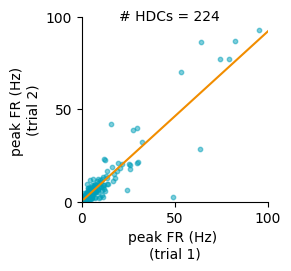

In [87]:

    
#check the correlation between clr in light1 and light2
from scipy.stats import pearsonr
clr_light1 = []
clr_light2 = []
for key in overlap_keys:
    clr_light1.append(phaseinfo_light1[key]['peak_fr'])
    clr_light2.append(phaseinfo_light2[key]['peak_fr'])
    
#print r and p value of the correlation
r, p = pearsonr(clr_light1, clr_light2)
print(r, p)

#scatter plot of clr in light1 and light2 with x axis as clr in light1 and y axis as clr in light2
fig, ax = plt.subplots(1, 1, figsize=(2., 2.))
ax.scatter(clr_light1, clr_light2, color='#009FB9', s=10, alpha=0.5)

#add a fit line
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(clr_light1, clr_light2)
x = np.linspace(np.min(clr_light1), np.max(clr_light1), 100)
y = slope*x + intercept
ax.plot(x, y, color='#F18D00')

#add cell number as text
ax.text(0.2, 0.98, '# HDCs = '+str(len(clr_light1)), fontsize=10, transform=ax.transAxes)

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_xticks([0, 50, 100])
ax.set_yticks([0, 50, 100])

ax.set_xlabel('peak FR (Hz) \n(trial 1)', fontsize=10)
ax.set_ylabel('peak FR (Hz) \n(trial 2)', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.savefig('/home/zilong/Desktop/HDPhasePrecession/figures/trial_comp_peakfr.pdf', dpi=300)

0.9473231014582956 9.528327890354899e-112


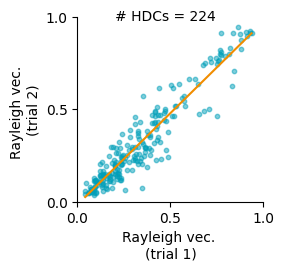

In [88]:

    
#check the correlation between clr in light1 and light2
from scipy.stats import pearsonr
clr_light1 = []
clr_light2 = []
for key in overlap_keys:
    clr_light1.append(phaseinfo_light1[key]['hd_rayleigh'])
    clr_light2.append(phaseinfo_light2[key]['hd_rayleigh'])
    
#print r and p value of the correlation
r, p = pearsonr(clr_light1, clr_light2)
print(r, p)

#scatter plot of clr in light1 and light2 with x axis as clr in light1 and y axis as clr in light2
fig, ax = plt.subplots(1, 1, figsize=(2.4, 2.4))
ax.scatter(clr_light1, clr_light2, color='#009FB9', s=10, alpha=0.5)

#add a fit line
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(clr_light1, clr_light2)
x = np.linspace(np.min(clr_light1), np.max(clr_light1), 100)
y = slope*x + intercept
ax.plot(x, y, color='#F18D00')

#add cell number as text
ax.text(0.2, 0.98, '# HDCs = '+str(len(clr_light1)), fontsize=10, transform=ax.transAxes)

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])

ax.set_xlabel('Rayleigh vec. \n(trial 1)', fontsize=10)
ax.set_ylabel('Rayleigh vec. \n(trial 2)', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('/home/zilong/Desktop/HDPhasePrecession/figures/trial_comp_Rayleigh.pdf', dpi=300)


0.9561611621848901 4.1183042253978064e-116


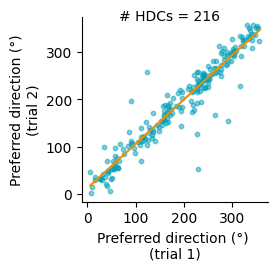

In [110]:

    
#check the correlation between clr in light1 and light2
from scipy.stats import pearsonr
clr_light1 = []
clr_light2 = []
for key in overlap_keys:
    if np.abs(phaseinfo_light1[key]['preferred_angle']-phaseinfo_light2[key]['preferred_angle'])>180: #one is 5 degree, the other is 355 degree, sometimes happen
        continue
    clr_light1.append(phaseinfo_light1[key]['preferred_angle'])
    clr_light2.append(phaseinfo_light2[key]['preferred_angle'])
    
#print r and p value of the correlation
r, p = pearsonr(clr_light1, clr_light2)
print(r, p)

#scatter plot of clr in light1 and light2 with x axis as clr in light1 and y axis as clr in light2
fig, ax = plt.subplots(1, 1, figsize=(2.4, 2.4))
ax.scatter(clr_light1, clr_light2, color='#009FB9', s=10, alpha=0.5)

#add a fit line
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(clr_light1, clr_light2)
x = np.linspace(np.min(clr_light1), np.max(clr_light1), 100)
y = slope*x + intercept
ax.plot(x, y, color='#F18D00')

#add cell number as text
ax.text(0.2, 0.98, '# HDCs = '+str(len(clr_light1)), fontsize=10, transform=ax.transAxes)

# ax.set_xlim(0,1)
# ax.set_ylim(0,1)
# ax.set_xticks([0, 0.5, 1])
# ax.set_yticks([0, 0.5, 1])

ax.set_xlabel('Preferred direction (°) \n(trial 1)', fontsize=10)
ax.set_ylabel('Preferred direction (°)\n(trial 2)', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('/home/zilong/Desktop/HDPhasePrecession/figures/trial_comp_preferred_angle.pdf', dpi=300)


0.9271141386761341 1.3770695178443243e-96


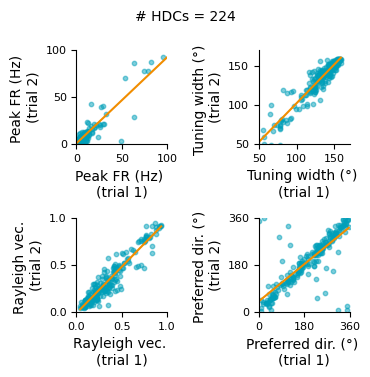

In [117]:
#for overlap keys, extract phase info in two groups
pvals_light1 = []
pvals_light2 = []

clr_light1 = []
clr_light2 = []

tune_width_light1 = []
tune_width_light2 = []

peak_fr_light1 = []
peak_fr_light2 = []

hd_rayleigh_light1 = []
hd_rayleigh_light2 = []

preferred_angle_light1 = []
preferred_angle_light2 = []

for key in overlap_keys:
    pvals_light1.append(phaseinfo_light1[key]['pval'])
    pvals_light2.append(phaseinfo_light2[key]['pval'])
    
    clr_light1.append(phaseinfo_light1[key]['clr'])
    clr_light2.append(phaseinfo_light2[key]['clr'])
    
    tune_width_light1.append(phaseinfo_light1[key]['tune_width'])
    tune_width_light2.append(phaseinfo_light2[key]['tune_width'])
    
    peak_fr_light1.append(phaseinfo_light1[key]['peak_fr'])
    peak_fr_light2.append(phaseinfo_light2[key]['peak_fr'])
    
    hd_rayleigh_light1.append(phaseinfo_light1[key]['hd_rayleigh'])
    hd_rayleigh_light2.append(phaseinfo_light2[key]['hd_rayleigh'])
    
    preferred_angle_light1.append(phaseinfo_light1[key]['preferred_angle'])
    preferred_angle_light2.append(phaseinfo_light2[key]['preferred_angle'])


# plot scatter plot of peak fr, tune width, hd rayleigh, clr in light1 and light2 in a 1*4 subplot
fig, axs = plt.subplots(2, 2, figsize=(3.8, 3.8))

labelsize = 10
ticksize = 8

ax = axs[0,0]
ax.scatter(peak_fr_light1, peak_fr_light2, color='#009FB9', s=10, alpha=0.5)
ax.set_xlabel('Peak FR (Hz) \n(trial 1)', fontsize=labelsize)
ax.set_ylabel('Peak FR (Hz) \n(trial 2)', fontsize=labelsize)

slope, intercept, r_value, p_value, std_err = linregress(peak_fr_light1, peak_fr_light2)
x = np.linspace(np.min(peak_fr_light1), np.max(peak_fr_light1), 100)
y = slope*x + intercept
ax.plot(x, y, color='#F18D00')

ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_xticks([0, 50, 100])
ax.set_yticks([0, 50, 100])

#orint pearson r and p value
r, p = pearsonr(peak_fr_light1, peak_fr_light2)
print(r, p)

ax = axs[0,1]
ax.scatter(tune_width_light1, tune_width_light2, color='#009FB9', s=10, alpha=0.5)
ax.set_xlabel('Tuning width (°) \n(trial 1)', fontsize=labelsize)
ax.set_ylabel('Tuning width (°) \n(trial 2)', fontsize=labelsize)

slope, intercept, r_value, p_value, std_err = linregress(tune_width_light1, tune_width_light2)
x = np.linspace(np.min(tune_width_light1), np.max(tune_width_light1), 100)
y = slope*x + intercept
ax.plot(x, y, color='#F18D00')

ax.set_xlim(50, 170)
ax.set_ylim(50, 170)
ax.set_xticks([50, 100, 150])
ax.set_yticks([50, 100, 150])

ax = axs[1,0]
ax.scatter(hd_rayleigh_light1, hd_rayleigh_light2, color='#009FB9', s=10, alpha=0.5)
ax.set_xlabel('Rayleigh vec. \n(trial 1)', fontsize=labelsize)
ax.set_ylabel('Rayleigh vec. \n(trial 2)', fontsize=labelsize)

slope, intercept, r_value, p_value, std_err = linregress(hd_rayleigh_light1, hd_rayleigh_light2)
x = np.linspace(np.min(hd_rayleigh_light1), np.max(hd_rayleigh_light1), 100)
y = slope*x + intercept
ax.plot(x, y, color='#F18D00')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])

ax = axs[1,1]
# ax.scatter(clr_light1, clr_light2, color='#009FB9', s=10, alpha=0.5)
# ax.set_xlabel('clcc (trial 1)', fontsize=labelsize)
# ax.set_ylabel('clcc (trial 2)', fontsize=labelsize)

# slope, intercept, r_value, p_value, std_err = linregress(clr_light1, clr_light2)
# x = np.linspace(np.min(clr_light1), np.max(clr_light1), 100)
# y = slope*x + intercept
# ax.plot(x, y, color='#F18D00')

# ax.set_xlim(-0.3, 0.2)
# ax.set_ylim(-0.3, 0.2)
# ax.set_xticks([-0.3, 0, 0.2])
# ax.set_yticks([-0.3, 0, 0.2])

#plot preferred angle
ax.scatter(preferred_angle_light1, preferred_angle_light2, color='#009FB9', s=10, alpha=0.5)
ax.set_xlabel('Preferred dir. (°) \n(trial 1)', fontsize=labelsize)
ax.set_ylabel('Preferred dir. (°) \n(trial 2)', fontsize=labelsize)

slope, intercept, r_value, p_value, std_err = linregress(preferred_angle_light1, preferred_angle_light2)
x = np.linspace(np.min(preferred_angle_light1), np.max(preferred_angle_light1), 100)
y = slope*x + intercept
ax.plot(x, y, color='#F18D00')

ax.set_xlim(0, 360)
ax.set_ylim(0, 360)
ax.set_xticks([0, 180, 360])
ax.set_yticks([0, 180, 360])


for ax in axs.flatten():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ticksize
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    
#add super title
plt.suptitle('# HDCs = '+str(len(clr_light1)), fontsize=10)
    
plt.tight_layout()

plt.savefig('/home/zilong/Desktop/HDPhasePrecession/figures/trial_comp.pdf', dpi=300)